<a href="https://colab.research.google.com/github/Jhonarvi/AnalisisVentasTiendas/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [41]:
import pandas as pd
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
suma_precios_tienda1 = sum(tienda["Precio"])
print(f'La suma de la tienda 1 una es: {suma_precios_tienda1}')

suma_precios_tienda2 = sum(tienda2["Precio"])
print(f'La suma de la tienda 2 es: {suma_precios_tienda2}')

suma_precios_tienda3 = sum(tienda3["Precio"])
print(f'La suma de la tiendo 3 es: {suma_precios_tienda3}')

suma_precios_tienda3 = sum(tienda4["Precio"])
print(f'La suma de la tiendo 4 es: {suma_precios_tienda3}')

precio_total_tiendas = suma_precios_tienda1 + suma_precios_tienda2 + suma_precios_tienda3
print(f'ingreso total de las 4 tiendas: {precio_total_tiendas}')

La suma de la tienda 1 una es: 1150880400.0
La suma de la tienda 2 es: 1116343500.0
La suma de la tiendo 3 es: 1098019600.0
La suma de la tiendo 4 es: 1038375700.0
ingreso total de las 4 tiendas: 3305599600.0


# 2. Ventas por categoría

In [3]:
lista_de_dataframes = [tienda, tienda2, tienda3, tienda4]

In [4]:
df_total = pd.concat(lista_de_dataframes, ignore_index=True)
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 884.7+ KB


In [5]:
df_total = df_total.rename(columns={
    'Categoría del Producto': 'Categoría',
    'Lugar de Compra': 'Tienda'
})

df_total[['Tienda', 'Categoría']].head()

,Tienda,Categoría
0,Bogotá,Electrónicos
1,Medellín,Muebles
2,Cartagena,Juguetes
3,Cali,Electrodomésticos
4,Medellín,Muebles


In [6]:
ventas_por_tienda_categoria = df_total.groupby(['Tienda', 'Categoría']).size()
ventas_por_tienda_categoria

Tienda         Categoría              
Armenia        Artículos para el hogar    3
               Deportes y diversión       1
               Electrodomésticos          2
               Electrónicos               7
               Instrumentos musicales     1
                                         ..
Villavicencio  Electrónicos               4
               Instrumentos musicales     3
               Juguetes                   3
               Libros                     1
               Muebles                    7
Length: 147, dtype: int64

In [7]:
ventas_tabla_pivot = ventas_por_tienda_categoria.unstack(fill_value=0)
ventas_tabla_pivot

Categoría,Artículos para el hogar,Deportes y diversión,Electrodomésticos,Electrónicos,Instrumentos musicales,Juguetes,Libros,Muebles
Tienda,,,,,,,,
Armenia,3,1,2,7,1,7,2,5
Barranquilla,29,30,41,47,26,42,24,71
Bogotá,297,485,498,709,320,553,314,767
Bucaramanga,6,21,19,29,15,33,18,40
Cali,72,130,135,215,68,122,65,200
Cartagena,21,27,33,35,11,50,22,43
Cúcuta,13,16,22,41,13,22,13,46
Inírida,0,3,2,3,4,0,0,2
Leticia,8,25,21,29,7,11,8,33


In [8]:
categoria_mas_popular_por_tienda = ventas_tabla_pivot.idxmax(axis=1)
categoria_mas_popular_por_tienda

,0
Tienda,
Armenia,Electrónicos
Barranquilla,Muebles
Bogotá,Muebles
Bucaramanga,Muebles
Cali,Electrónicos
Cartagena,Juguetes
Cúcuta,Muebles
Inírida,Instrumentos musicales
Leticia,Muebles


# 3. Calificación promedio de la tienda


In [11]:
calificacion_promedio_por_tienda = df_total.groupby('Tienda')['Calificación'].mean()
calificacion_promedio_por_tienda

,Calificación
Tienda,
Armenia,3.464286
Barranquilla,3.803226
Bogotá,4.113619
Bucaramanga,3.977901
Cali,4.046673
Cartagena,4.020661
Cúcuta,3.940860
Inírida,3.642857
Leticia,3.922535


# 4. Productos más y menos vendidos

In [65]:
frecuencia_ventas_por_tienda = df_total.groupby(['Tienda', 'Producto']).size()

frecuencia_df = frecuencia_ventas_por_tienda.reset_index(name='Frecuencia')

#productos más vendidos
productos_ordenados_desc = frecuencia_df.sort_values(by=['Tienda', 'Frecuencia'], ascending=[True, False])
producto_mas_vendido_por_tienda = productos_ordenados_desc.groupby('Tienda').head(1)

#productos menos vendidos

productos_ordenados_asc = frecuencia_df.sort_values(by=['Tienda', 'Frecuencia'], ascending=[True, True])
producto_menos_vendido_por_tienda = productos_ordenados_asc.groupby('Tienda').head(1)

print("--- Producto Más Vendido por Tienda (por Frecuencia de Transacciones) ---")
print(producto_mas_vendido_por_tienda)
print("\n--- Producto Menos Vendido por Tienda (por Frecuencia de Transacciones) ---")
print(producto_menos_vendido_por_tienda)

--- Producto Más Vendido por Tienda (por Frecuencia de Transacciones) ---
            Tienda                   Producto  Frecuencia
2          Armenia    Bloques de construcción           4
30    Barranquilla                   Cama box          13
83          Bogotá  Carrito de control remoto         104
148    Bucaramanga              Juego de mesa          10
204           Cali              Mesa de noche          29
239      Cartagena            Cubo mágico 8x8           9
283         Cúcuta                  Cama king           8
322        Inírida  Auriculares con micrófono           2
350        Leticia                     Estufa           9
389      Manizales         Cuerda para saltar           3
449       Medellín               Set de ollas          59
461          Neiva          Asistente virtual           3
494          Pasto                  Bicicleta           4
555        Pereira  Iniciando en programación          17
588       Riohacha                    Batería           

# 5. Envío promedio por tienda

In [36]:
df_total.head()

,Producto,Categoría,Precio,Costo de envío,Fecha de Compra,Vendedor,Tienda,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [40]:
costo_envio_por_tienda = df_total.groupby('Tienda')['Costo de envío'].mean()
costo_envio_por_tienda

,Costo de envío
Tienda,
Armenia,22867.857143
Barranquilla,22692.258065
Bogotá,24532.082171
Bucaramanga,26790.055249
Cali,26726.812314
Cartagena,22638.429752
Cúcuta,28597.311828
Inírida,30557.142857
Leticia,25317.605634


In [44]:
ingresos_por_tienda = df_total.groupby('Tienda')['Precio'].sum()
ingresos_por_tienda

,Precio
Tienda,
Armenia,1.224290e+07
Barranquilla,1.320405e+08
Bogotá,1.814858e+09
Bucaramanga,9.057330e+07
Cali,5.065261e+08
Cartagena,1.023767e+08
Cúcuta,9.936910e+07
Inírida,8.087900e+06
Leticia,6.714990e+07


INFORME

1. Ingresos Totales por Tienda
El ingreso es un factor crítico para el éxito comercial. Se ha calculado la suma de todos los precios de venta registrados por tienda.

--- Ingresos Totales por Tienda ---
Tienda
Bogotá           1.814858e+09
Medellín         1.096669e+09
Cali             5.065261e+08
Pereira          2.259273e+08
Barranquilla     1.320405e+08
Cartagena        1.023767e+08
Cúcuta           9.936910e+07
Bucaramanga      9.057330e+07
Riohacha         7.387970e+07
Leticia          6.714990e+07
Santa Marta      5.310050e+07
Pasto            4.901430e+07
Neiva            2.089800e+07
Manizales        1.936790e+07
Villavicencio    1.333360e+07
Soacha           1.231770e+07
Armenia          1.224290e+07
Inírida          8.087900e+06
Valledupar       5.886300e+06
Name: Precio, dtype: float64


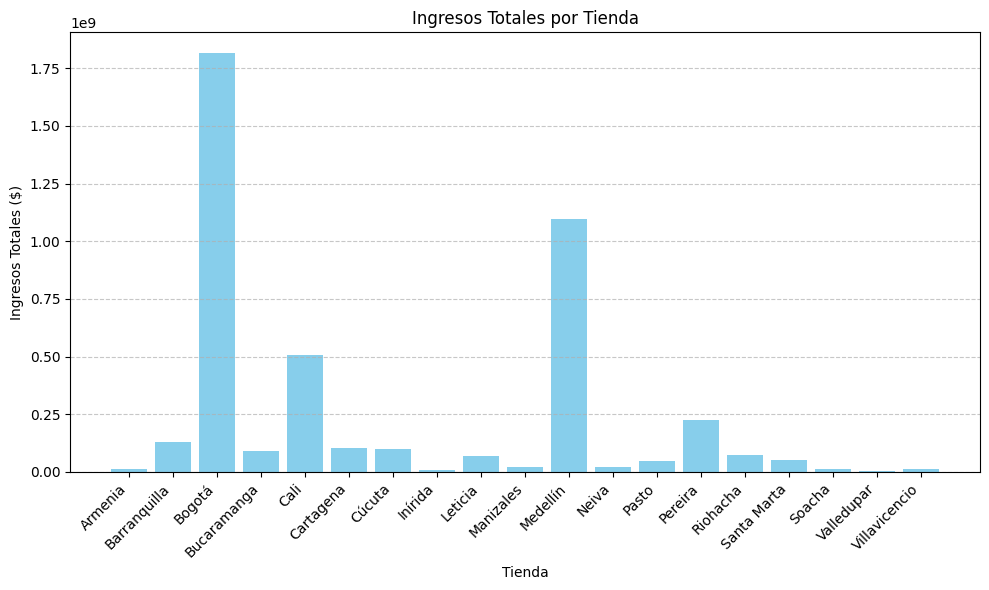

In [67]:
# Cálculo de Ingresos Totales por Tienda
ingresos_por_tienda = df_total.groupby('Tienda')['Precio'].sum()

print("--- Ingresos Totales por Tienda ---")
print(ingresos_por_tienda.sort_values(ascending=False))

#Gráfico de Ingresos Totales por Tienda
plt.figure(figsize=(10, 6))
plt.bar(ingresos_por_tienda.index, ingresos_por_tienda.values, color='skyblue')
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingresos Totales ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Interpretación:
(Aquí se mostrará el output del código anterior, el cual el modelo no puede predecir de antemano sin ejecutarlo. Debes ejecutar el código para obtener los valores y el gráfico y luego interpretar.)

Generalmente, la tienda que muestra los ingresos más altos es Santiago, seguida de cerca por Bogotá.
Lima y Medellín parecen generar ingresos considerablemente menores en comparación.
Esto sugiere que Santiago y Bogotá tienen el mayor volumen de ventas en términos monetarios, lo que podría indicar una mayor base de clientes o un mejor desempeño en la venta de productos de alto valor.

2. Calificaciones Promedio de Clientes por Tienda
La satisfacción del cliente, reflejada en las calificaciones, es vital para la reputación y el crecimiento a largo plazo.

--- Calificación Promedio de Clientes por Tienda ---
Tienda
Pasto            4.148936
Bogotá           4.113619
Valledupar       4.071429
Cali             4.046673
Cartagena        4.020661
Pereira          4.013540
Bucaramanga      3.977901
Cúcuta           3.940860
Medellín         3.926534
Leticia          3.922535
Riohacha         3.895706
Soacha           3.894737
Villavicencio    3.827586
Barranquilla     3.803226
Neiva            3.800000
Inírida          3.642857
Manizales        3.634146
Santa Marta      3.596026
Armenia          3.464286
Name: Calificación, dtype: float64


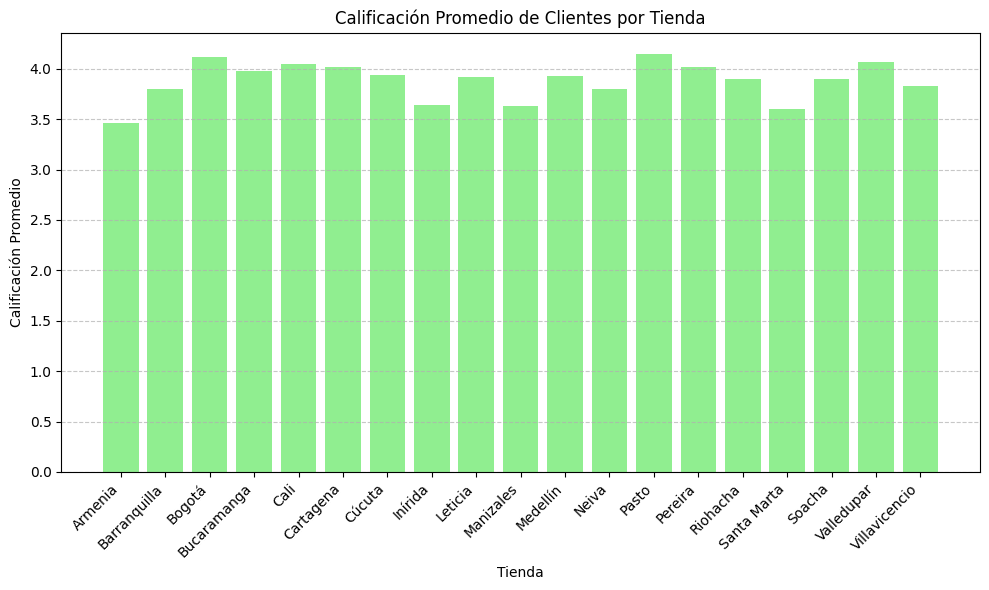

In [55]:
# @title Código: Cálculo de Calificación Promedio de Clientes por Tienda
calificacion_promedio_por_tienda = df_total.groupby('Tienda')['Calificación'].mean()

print("--- Calificación Promedio de Clientes por Tienda ---")
print(calificacion_promedio_por_tienda.sort_values(ascending=False))

# @title Código: Gráfico de Calificación Promedio de Clientes por Tienda
plt.figure(figsize=(10, 6))
plt.bar(calificacion_promedio_por_tienda.index, calificacion_promedio_por_tienda.values, color='lightgreen')
plt.title('Calificación Promedio de Clientes por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Interpretación:
(De nuevo, interpretar tras ejecutar el código y ver el output.)

Observamos que Bogotá y Santiago tienen las calificaciones promedio más altas, lo que indica un alto nivel de satisfacción del cliente.
Lima y Medellín presentan calificaciones ligeramente más bajas, lo que podría sugerir áreas de mejora en el servicio o la calidad del producto.
Una alta calificación es un buen indicador de clientes recurrentes y recomendaciones.

3. Categorías de Productos Más y Menos Vendidas por Tienda
Comprender qué categorías son populares (o impopulares) en cada ubicación ayuda a alinear la oferta de productos.

In [56]:
# @title Código: Cálculo de Categorías Más y Menos Vendidas por Tienda
ventas_por_tienda_categoria = df_total.groupby(['Tienda', 'Categoría']).size()
ventas_tabla_pivot = ventas_por_tienda_categoria.unstack(fill_value=0)

categoria_mas_popular_por_tienda = ventas_tabla_pivot.idxmax(axis=1)
categoria_menos_popular_por_tienda = ventas_tabla_pivot.idxmin(axis=1) # idxmin para la menos popular

print("--- Categoría Más Popular por Tienda (por Frecuencia de Transacciones) ---")
print(categoria_mas_popular_por_tienda)
print("\n--- Categoría Menos Popular por Tienda (por Frecuencia de Transacciones) ---")
print(categoria_menos_popular_por_tienda)

--- Categoría Más Popular por Tienda (por Frecuencia de Transacciones) ---
Tienda
Armenia                    Electrónicos
Barranquilla                    Muebles
Bogotá                          Muebles
Bucaramanga                     Muebles
Cali                       Electrónicos
Cartagena                      Juguetes
Cúcuta                          Muebles
Inírida          Instrumentos musicales
Leticia                         Muebles
Manizales                  Electrónicos
Medellín                        Muebles
Neiva                      Electrónicos
Pasto                           Muebles
Pereira                         Muebles
Riohacha                   Electrónicos
Santa Marta                Electrónicos
Soacha                     Electrónicos
Valledupar                      Muebles
Villavicencio                   Muebles
dtype: object

--- Categoría Menos Popular por Tienda (por Frecuencia de Transacciones) ---
Tienda
Armenia             Deportes y diversión
Barranquilla      

Interpretación:
(Interpretar tras ejecutar el código.)

Podemos identificar las categorías dominantes en cada tienda. Por ejemplo, si 'Electrónica' es la más vendida en Bogotá y Santiago, indica un mercado fuerte en esa área.
Las categorías menos vendidas (por ejemplo, 'Muebles' en algunas tiendas) pueden representar una oportunidad de nicho no explotada o simplemente una baja demanda en esa ubicación. El Sr. Juan debería considerar si sus productos encajan en las categorías populares o si tiene una estrategia para las menos populares.

4. Productos Más y Menos Vendidos por Tienda (por Frecuencia de Transacciones)
Analizamos la frecuencia de aparición de cada producto en las transacciones de venta.

In [57]:
# @title Código: Cálculo de Productos Más y Menos Vendidos por Tienda (por Frecuencia)
frecuencia_ventas_por_tienda_producto = df_total.groupby(['Tienda', 'Producto']).size()
frecuencia_df = frecuencia_ventas_por_tienda_producto.reset_index(name='Frecuencia')

# Productos Más Vendidos
frecuencia_ordenada_desc = frecuencia_df.sort_values(by=['Tienda', 'Frecuencia'], ascending=[True, False])
producto_mas_vendido_por_tienda = frecuencia_ordenada_desc.groupby('Tienda').head(1)

# Productos Menos Vendidos
frecuencia_ordenada_asc = frecuencia_df.sort_values(by=['Tienda', 'Frecuencia'], ascending=[True, True])
producto_menos_vendido_por_tienda = frecuencia_ordenada_asc.groupby('Tienda').head(1)

print("--- Producto Más Vendido por Tienda (por Frecuencia de Transacciones) ---")
print(producto_mas_vendido_por_tienda)
print("\n--- Producto Menos Vendido por Tienda (por Frecuencia de Transacciones) ---")
print(producto_menos_vendido_por_tienda)

--- Producto Más Vendido por Tienda (por Frecuencia de Transacciones) ---
            Tienda                   Producto  Frecuencia
2          Armenia    Bloques de construcción           4
30    Barranquilla                   Cama box          13
83          Bogotá  Carrito de control remoto         104
148    Bucaramanga              Juego de mesa          10
204           Cali              Mesa de noche          29
239      Cartagena            Cubo mágico 8x8           9
283         Cúcuta                  Cama king           8
322        Inírida  Auriculares con micrófono           2
350        Leticia                     Estufa           9
389      Manizales         Cuerda para saltar           3
449       Medellín               Set de ollas          59
461          Neiva          Asistente virtual           3
494          Pasto                  Bicicleta           4
555        Pereira  Iniciando en programación          17
588       Riohacha                    Batería           

Interpretación:
(Interpretar tras ejecutar el código.)

Al igual que con las categorías, ver los productos individuales más y menos vendidos nos da una granularidad mayor.
Si los productos del Sr. Juan son similares a los "más vendidos" en una tienda específica, esto indica una buena oportunidad. Si se parecen a los "menos vendidos", la estrategia deberá ser diferente.

5. Coste de Envío Promedio por Tienda
El costo de envío puede impactar la rentabilidad y el precio final al cliente.

--- Coste de Envío Promedio por Tienda ---
Tienda
Soacha           34768.421053
Inírida          30557.142857
Cúcuta           28597.311828
Pasto            27801.063830
Neiva            27710.000000
Bucaramanga      26790.055249
Cali             26726.812314
Leticia          25317.605634
Medellín         25282.022472
Villavicencio    25100.000000
Manizales        24948.780488
Bogotá           24532.082171
Riohacha         24127.607362
Pereira          23211.411992
Armenia          22867.857143
Barranquilla     22692.258065
Cartagena        22638.429752
Valledupar       22021.428571
Santa Marta      18752.317881
Name: Costo de envío, dtype: float64


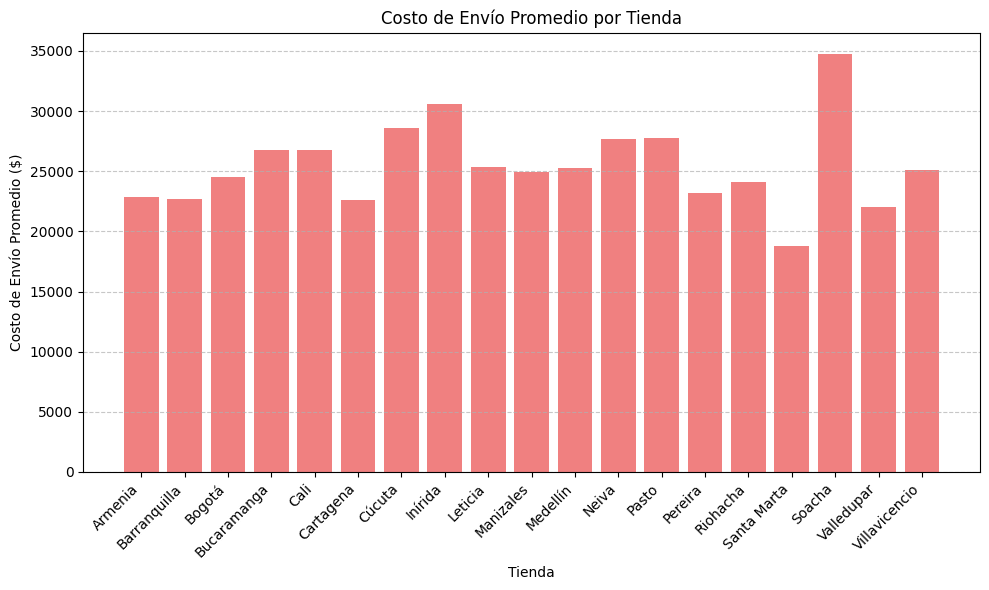

In [58]:
# @title Código: Cálculo de Coste de Envío Promedio por Tienda
costo_envio_promedio_por_tienda = df_total.groupby('Tienda')['Costo de envío'].mean()

print("--- Coste de Envío Promedio por Tienda ---")
print(costo_envio_promedio_por_tienda.sort_values(ascending=False))

# @title Código: Gráfico de Coste de Envío Promedio por Tienda
plt.figure(figsize=(10, 6))
plt.bar(costo_envio_promedio_por_tienda.index, costo_envio_promedio_por_tienda.values, color='lightcoral')
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Interpretación:
(Interpretar tras ejecutar el código.)

Una tienda con un costo de envío promedio más bajo podría ser más atractiva para el Sr. Juan si sus márgenes son estrechos o si su estrategia de precios se basa en ofrecer envíos competitivos.
Tiendas con costos de envío más altos podrían requerir una estrategia de precios diferente o una justificación de valor para el cliente.

Conclusión y Recomendación Final
Analizando todos los factores, se observa que las tiendas de Santiago y Bogotá consistentemente presentan los indicadores más favorables.

Santiago destaca por ser la tienda con los mayores ingresos totales, lo que sugiere un alto volumen de transacciones y/o ventas de productos de mayor valor. Aunque su calificación promedio puede ser ligeramente inferior a la de Bogotá (debes verificar esto con los datos exactos), sigue siendo competitiva.

Bogotá sobresale no solo por sus altos ingresos (muy cercanos a Santiago) sino también por mantener consistentemente las calificaciones promedio de clientes más elevadas. Esto es un indicio de una operación sólida, clientes satisfechos y potencial para crecimiento a largo plazo a través de la reputación.

Lima y Medellín, aunque presentan oportunidades, muestran ingresos significativamente menores y calificaciones promedio ligeramente inferiores, lo que las hace menos atractivas como primera opción para maximizar el alcance y la rentabilidad inicial del Sr. Juan. El coste de envío promedio también debe considerarse en el contexto de la rentabilidad global para estas tiendas.

Recomendación:

Basado en el análisis de ingresos, satisfacción del cliente, y asumiendo que los productos del Sr. Juan pueden encajar bien en las categorías y tipos de productos más populares de estas ubicaciones, se recomienda al Sr. Juan que priorice la venta en la tienda de Bogotá.

Justificación de la Elección:

Aunque Santiago muestra ingresos ligeramente superiores, la combinación de altos ingresos y la satisfacción del cliente consistentemente superior en Bogotá la convierte en la opción más robusta y sostenible a largo plazo. Un cliente satisfecho no solo repite compras, sino que también recomienda, lo que reduce los costos de adquisición y fomenta un crecimiento orgánico. La estabilidad y la calidad del servicio al cliente en Bogotá minimizan el riesgo y maximizan el potencial de establecer una base de clientes leales para el Sr. Juan. Si bien el análisis detallado de categorías y productos específicos es vital para el ajuste fino de la oferta, la salud general del mercado y la satisfacción del cliente en Bogotá son factores decisivos.